# Tutorial for Mental Health Prediction 


El dataset es sobre la salud mental de los empleados en la industria tecnologica. Vamos a intentar predecir si han buscado tratamiento en el pasado. 

## Empezamos importando librerías

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


In [ ]:
data = pd.read_csv('survey.csv')

In [ ]:
! rm -Rf 

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Cleaning

In [ ]:
#Obtenemos el numero de NaN results in each column 
data.isna().sum()

#Obtenemos el porcentaje de missing values in each column
data.isna().mean()

#Hay un porcentaje muy elevado en la columna comments así que la descartamos. Columns is an extra the people enters


Timestamp                    0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
state                        0.409055
self_employed                0.014297
family_history               0.000000
treatment                    0.000000
work_interfere               0.209690
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
comments    

In [ ]:
#Quitamos la columna comments
data = data.drop('comments', axis=1)

In [ ]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [ ]:
#The state is only applicable if country is US
#get dummies codifica 1 si true y 0 si false
pd.get_dummies(data['state'])

,AL,AZ,CA,CO,CT,DC,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1255,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1256,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# self employed y work interference tambien tiene  cierto porcentaje de NaN
# miramos los posibles valores de cada columna 
data['self_employed'].unique()
data['work_interfere'].unique()


array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
#obtenemos la moda de la columna self_employed
#id 0 para columnas y id 1 para filas
data['self_employed'].mode()

0    No
dtype: object

In [ ]:
#vamos a suponer que los valores que faltan en self_employed por lo tanto son que no
data['self_employed']=data['self_employed'].fillna('No')
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [ ]:
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
#work_interfere 
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
#moda de work_interfere
#obtenemos que es Sometimes así que rellenamos con Sometimes
data['work_interfere'].mode()


0    Sometimes
dtype: object

In [ ]:
data['work_interfere']=data['work_interfere'].fillna('Sometimes')

In [ ]:
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

## Feature Engineering 

In [ ]:
#Vamos a ordenar por timestamp, vemos que va de 2014 a 2016

data['Timestamp']

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [ ]:
#para ver solo el año aplicamos esta funcion entre los caracteres 0 a 4. de forma que solo nos coge el año
data['Timestamp'].apply(lambda x: np.int(x[0:4]))

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
1254    2015
1255    2015
1256    2015
1257    2015
1258    2016
Name: Timestamp, Length: 1259, dtype: int64

In [ ]:
#Añadimos una nueva columna con solamente el año
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))

In [ ]:
#Analogamente con el resto de campos del timestamp
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))

data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:13]))
data['Minute'] = data['Timestamp'].apply(lambda x: np.int(x[14:16]))
data['Second'] = data['Timestamp'].apply(lambda x: np.int(x[17:19]))

#axis=1 es para borrar la columna

data =data.drop('Timestamp', axis=1)

In [ ]:
data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute,Second
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,2014,8,27,11,29,31
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,2014,8,27,11,29,37
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,2014,8,27,11,29,44
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,2014,8,27,11,29,46
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,2015,9,12,11,17,21
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,2015,9,26,1,7,35
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,2015,11,7,12,36,58
1257,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,2015,11,30,21,25,6


## Encoding Features

In [ ]:
#Qué tipo de datos tiene cada columna
#Cuántos unique values tenemos para cada columna

{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}


{'Country': 48,
 'Gender': 49,
 'anonymity': 3,
 'benefits': 3,
 'care_options': 3,
 'coworkers': 3,
 'family_history': 2,
 'leave': 5,
 'mental_health_consequence': 3,
 'mental_health_interview': 3,
 'mental_vs_physical': 3,
 'no_employees': 6,
 'obs_consequence': 2,
 'phys_health_consequence': 3,
 'phys_health_interview': 3,
 'remote_work': 2,
 'seek_help': 3,
 'self_employed': 2,
 'state': 46,
 'supervisor': 3,
 'tech_company': 2,
 'treatment': 2,
 'wellness_program': 3,
 'work_interfere': 4}

In [ ]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

#vemos los valores posibles para cada valor.
#Por ejemplo en gender tenemos mal male como lo mismo, eso se debería aunar


{'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Africa',
  'Italy',
  'Sweden',
  'Colombia',
  'Latvia',
  'Romania',
  'Belgium',
  'New Zealand',
  'Zimbabwe',
  'Spain',
  'Finland',
  'Uruguay',
  'Israel',
  'Bosnia and Herzegovina',
  'Hungary',
  'Singapore',
  'Japan',
  'Nigeria',
  'Croatia',
  'Norway',
  'Thailand',
  'Denmark',
  'Bahamas, The',
  'Greece',
  'Moldova',
  'Georgia',
  'China',
  'Czech Republic',
  'Philippines'],
 'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enb

In [ ]:
def encode_gender(x):
  if x.lower()[0] == 'f':
    return 0
  elif x.lower()[0]  == 'm':
    return 1
  else:
    return 2

data['Gender'].apply(encode_gender).unique()

array([0, 1, 2])

In [ ]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [ ]:
#Vamos con el apartado country
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
    'no_employees'
]

nominal_features = [
    'Country',
    'state',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]



In [ ]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df


In [ ]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [ ]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [ ]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

In [ ]:
data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [ ]:
data


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,Year,Month,Day,Hour,Minute,Second,co_Australia,co_Austria,"co_Bahamas, The",co_Belgium,co_Bosnia and Herzegovina,co_Brazil,co_Bulgaria,co_Canada,co_China,co_Colombia,co_Costa Rica,co_Croatia,co_Czech Republic,co_Denmark,co_Finland,co_France,co_Georgia,co_Germany,co_Greece,co_Hungary,co_India,co_Ireland,co_Israel,co_Italy,...,re_No,re_Yes,be_No,be_Not sure,be_Yes,ca_Don't know,ca_No,ca_Yes,we_Don't know,we_No,we_Yes,se_Don't know,se_No,se_Yes,an_Don't know,an_Somewhat difficult,an_Somewhat easy,an_Very difficult,an_Very easy,le_Maybe,le_No,le_Yes,mc_Maybe,mc_No,mc_Yes,ph_No,ph_Some of them,ph_Yes,cw_No,cw_Some of them,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,37,0,0,0,Yes,3,1,0,1,0,2014,8,27,11,29,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,No,1,5,0,0,0,2014,8,27,11,29,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,No,1,1,0,1,0,2014,8,27,11,29,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,Yes,3,2,0,1,1,2014,8,27,11,29,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,No,0,3,1,1,0,2014,8,27,11,30,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,1,0,2015,9,12,11,17,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,Yes,3,2,1,1,0,2015,9,26,1,7,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1
1256,34,1,0,1,Yes,2,5,0,1,0,2015,11,7,12,36,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1257,46,0,0,0,No,2,3,1,1,0,2015,11,30,21,25,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
#nos muestra si o no en el tratamiento 
data.select_dtypes('object')

print('Remaining non-numeric columns', len(data.select_dtypes('object').columns))

Remaining non-numeric columns 1


## Encoding Labels

In [ ]:
#codificamos el sí del tratamiento con 1 y el no con 0
data  = binary_encode(data, columns=['treatment'], positive_values=['Yes'])

In [ ]:
data.select_dtypes('object')


""
0
1
2
3
4
...
1254
1255
1256
1257


In [ ]:
print('Remaining missing values', data.isna().sum().sum())

Remaining missing values 0


##Splitting/Scaling

In [ ]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

##Training

In [ ]:
X.shape

(1259, 149)

In [ ]:
print('Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%'.format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 49.7% / 50.3%


In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics=[
             'accuracy',
             tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[
               tf.keras.callbacks.ReduceLROnPlateau()
    ]
)


Epoch 1/50
11/11 [==============================] - 2s 58ms/step - loss: 0.6586 - accuracy: 0.6406 - auc: 0.6957 - val_loss: 0.6964 - val_accuracy: 0.6271 - val_auc: 0.7154 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - 0s 29ms/step - loss: 0.4097 - accuracy: 0.8011 - auc: 0.8944 - val_loss: 0.7699 - val_accuracy: 0.6158 - val_auc: 0.6914 - lr: 0.0010
Epoch 3/50
11/11 [==============================] - 0s 27ms/step - loss: 0.2977 - accuracy: 0.8764 - auc: 0.9491 - val_loss: 0.8824 - val_accuracy: 0.6158 - val_auc: 0.6798 - lr: 0.0010
Epoch 4/50
11/11 [==============================] - 0s 30ms/step - loss: 0.2149 - accuracy: 0.9304 - auc: 0.9802 - val_loss: 0.9535 - val_accuracy: 0.6271 - val_auc: 0.6917 - lr: 0.0010
Epoch 5/50
11/11 [==============================] - 0s 28ms/step - loss: 0.1535 - accuracy: 0.9432 - auc: 0.9923 - val_loss: 1.0999 - val_accuracy: 0.6271 - val_auc: 0.6838 - lr: 0.0010
Epoch 6/50
11/11 [==============================] - 0s 28ms/step - los

## Results

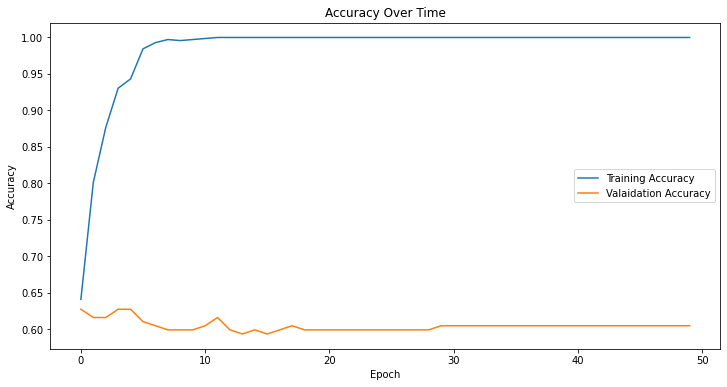

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Valaidation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.title('Accuracy Over Time')

plt.show()






In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 8ms/step - loss: 1.7751 - accuracy: 0.6905 - auc: 0.7270


[1.7750978469848633, 0.6904761791229248, 0.7269728779792786]